In [1]:
# scraping the pdf files to obtain the url

In [2]:
import requests
import pandas as pd
import urllib.request
import pdftotext
import promptlib #pip install prompt
import os
import glob
#conda install poppler : conda install -c conda-forge poppler
# conda install pdftotext : conda install -c conda-forge pdftotext
# conda install nltk : conda install -c anaconda nltk
from nltk import *
from nltk.corpus import *
import nltk
import sys
from sklearn.metrics.pairwise import cosine_similarity
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer
# Import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel


In [3]:
#get download.csv by going on https://tel.archives-ouvertes.fr/search/advanced-export/uri/%3FomitHeader%3Dtrue%26wt%3Dphps%26q%3D%252A%26sort%3DsubmittedDate_tdate%2Bdesc%26fq%3DdocType_s%253A%2528THESE%2BOR%2BHDR%2529%26fq%3DsubmitType_s%253Afile%26fq%3DNOT%2Bstatus_i%253A111%26defType%3Dedismax%26rows%3D1000
#then export csv
df = pd.read_csv("H:/Downloads/Datatsets/Tel/tel_docs.csv")

In [4]:
df.head()

,halId_s,version_i,uri_s,docType_s,doiId_s,nntId_s,title_s,subTitle_s,authFullName_s,producedDate_s,...,journalTitle_s,journalPublisher_s,volume_s,number_s,page_s,conferenceTitle_s,conferenceStartDate_s,country_s,language_s,inPress_bool
0,tel-03440243,1,https://hal.univ-lorraine.fr/tel-03440243,THESE,NaN,2021LORR0152,L'impact des systèmes d'information hospitalie...,NaN,Sarah Garidi,2021-01-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
1,tel-03440181,1,https://tel.archives-ouvertes.fr/tel-03440181,THESE,NaN,2021UPASG065,Algorithmes multi-critères pour la prédiction ...,NaN,Louis Becquey,2021-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
2,tel-03440058,1,https://tel.archives-ouvertes.fr/tel-03440058,THESE,NaN,2021NORMR027,La microfinance et appui au microentrepreneuri...,NaN,Théogène Nsengiyumva,2021-09-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
3,tel-03439538,1,https://pastel.archives-ouvertes.fr/tel-03439538,THESE,NaN,2020IAVF0016,Importance de la re-domestication pour la cons...,NaN,Cathy Bouffartigue,2020-12-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
4,tel-03439366,1,https://hal.archives-ouvertes.fr/tel-03439366,THESE,NaN,NaN,"Homomorphic Cryptography and Privacy,Cryptogra...",NaN,Chloé Hébant,2021-05-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False


In [6]:
#convert urls to list
list_urls=df["uri_s"].values.tolist()

In [7]:
#convert ids to list
list_ids=df["halId_s"].values.tolist()

In [8]:
list_ids

['tel-03440243',
 'tel-03440181',
 'tel-03440058',
 'tel-03439538',
 'tel-03439366',
 'tel-03439358',
 'tel-03439354',
 'tel-03439346',
 'tel-03439261',
 'tel-03438938',
 'tel-03438925',
 'tel-03438923',
 'tel-03438921',
 'tel-03438863',
 'tel-03438829',
 'tel-03438828',
 'tel-03438811',
 'tel-03438755',
 'tel-03438105',
 'tel-03438104',
 'tel-03438103',
 'tel-03438102',
 'tel-03438101',
 'tel-03438100',
 'tel-03437616',
 'tel-03437573',
 'tel-03437572',
 'tel-01689242',
 'tel-03412908',
 'tel-03437282',
 'tel-03437096',
 'tel-03437063',
 'tel-03096870',
 'tel-03436551',
 'tel-03436548',
 'tel-03436545',
 'tel-03436542',
 'tel-03436530',
 'tel-03436527',
 'tel-03436501',
 'tel-03436409',
 'tel-03436405',
 'tel-03436394',
 'tel-03436372',
 'tel-03436368',
 'tel-03436364',
 'tel-03436335',
 'tel-03436173',
 'tel-03436157',
 'tel-03436137',
 'tel-03436087',
 'tel-03436025',
 'tel-03436024',
 'tel-03436023',
 'tel-03436011',
 'tel-03435936',
 'tel-03435885',
 'tel-03435884',
 'tel-03435883

## List urls

In [8]:
#we need 50 urls, so we just subset the first 50

In [ ]:
#testing on one pdf file
urllib.request.urlretrieve("https://tel.archives-ouvertes.fr/tel-03436157/document", "test1.pdf")

In [8]:
#subset 50 ids from list
list_ids = list_ids[:50]

In [ ]:
count=0
#first 50 urls
for i in list_urls[:50]:
    
    url = i +"/document"
    #download 50 pdfs
    urllib.request.urlretrieve(url, "{}.pdf".format(list_ids[count]))
    print(count,end="\r")
    count +=1

## Convert pdf to text files

In [9]:
extension = "pdf"
#Prompt directory in which all files were downloaded, 
prompter = promptlib.Files()
#Set working directory to chosen directory
dir = prompter.dir()
os.chdir(dir)
#Get list of all pdf files in directory
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [10]:
#downloaded excess files so subset 50 out of the list
all_filenames=all_filenames[5:55]

In [11]:
len(all_filenames)

50

In [41]:
for file in all_filenames:
    with open(file, "rb") as f:
        pdf = pdftotext.PDF(f)
    # Save all text to a txt file.
    split_string = file.split(".", 1)
    substring = split_string[0]
    with open('{}'.format(substring+".txt"), 'w',encoding="utf-8") as f:
        f.write("\n\n".join(pdf))

## LANGUAGE DETECTION

In [46]:
#download stopwords from nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
#check for which languages we have stopwords
stopwords.fileids()


['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [19]:
# reference  : https://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/

try:
    from nltk import wordpunct_tokenize
    from nltk.corpus import stopwords
except ImportError:
    print ('[!] You need to install nltk (http://nltk.org/index.html)')



#----------------------------------------------------------------------
def _calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Dictionary with languages and unique stopwords seen in analyzed text
    @rtype: dict
    """

    languages_ratios = {}

    '''
    nltk.wordpunct_tokenize() splits all punctuations into separate tokens
    
    >>> wordpunct_tokenize("That's thirty minutes away. I'll be there in ten.")
    ['That', "'", 's', 'thirty', 'minutes', 'away', '.', 'I', "'", 'll', 'be', 'there', 'in', 'ten', '.']
    '''

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]

    # Compute per language included in nltk number of unique stopwords appearing in analyzed text
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)

        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios


#----------------------------------------------------------------------
def detect_language(text):
    """
    Calculate probability of given text to be written in several languages and
    return the highest scored.
    
    It uses a stopwords based approach, counting how many unique stopwords
    are seen in analyzed text.
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Most scored language guessed
    @rtype: str
    """

    ratios = _calculate_languages_ratios(text)

    most_rated_language = max(ratios, key=ratios.get)

    return most_rated_language





In [12]:
# Apply to our text files 

In [5]:
extension = "txt"
#Prompt directory in which all files were downloaded, 
prompter = promptlib.Files()
#Set working directory to chosen directory
dir = prompter.dir()
os.chdir(dir)
#Get list of all pdf files
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [6]:
all_filenames

['tel-03435883.txt',
 'tel-03435884.txt',
 'tel-03435885.txt',
 'tel-03435936.txt',
 'tel-03436011.txt',
 'tel-03436023.txt',
 'tel-03436024.txt',
 'tel-03436025.txt',
 'tel-03436087.txt',
 'tel-03436137.txt',
 'tel-03436157.txt',
 'tel-03436173.txt',
 'tel-03436335.txt',
 'tel-03436364.txt',
 'tel-03436368.txt',
 'tel-03436372.txt',
 'tel-03436394.txt',
 'tel-03436405.txt',
 'tel-03436409.txt',
 'tel-03436501.txt',
 'tel-03436527.txt',
 'tel-03436530.txt',
 'tel-03436542.txt',
 'tel-03436545.txt',
 'tel-03436548.txt',
 'tel-03436551.txt',
 'tel-03437063.txt',
 'tel-03437096.txt',
 'tel-03437282.txt',
 'tel-03437572.txt',
 'tel-03437573.txt',
 'tel-03437616.txt',
 'tel-03438100.txt',
 'tel-03438101.txt',
 'tel-03438102.txt',
 'tel-03438103.txt',
 'tel-03438104.txt',
 'tel-03438105.txt',
 'tel-03438755.txt',
 'tel-03438811.txt',
 'tel-03438828.txt',
 'tel-03438829.txt',
 'tel-03438863.txt',
 'tel-03438921.txt',
 'tel-03438923.txt',
 'tel-03438925.txt',
 'tel-03438938.txt',
 'tel-0343926

## Detecting language on one text file

In [16]:

f = open('tel-03439354.txt', 'r',encoding="utf-8")


In [17]:
text = f.read()


In [21]:
language = detect_language(text)
language

'english'

## Detecting languages on the 50 text files

In [22]:
for file in all_filenames:
    with open(file, "r",encoding="utf-8") as f:
        #read file as text and store in variable `text`
        text = f.read()
        split_string = file.split(".", 1)
        substring = split_string[0]
        language = detect_language(text)
        print("Thesis ID :{}".format(substring) +" Language : {}".format(language))
   

Thesis ID :tel-03435883 Language : english
Thesis ID :tel-03435884 Language : english
Thesis ID :tel-03435885 Language : english
Thesis ID :tel-03435936 Language : english
Thesis ID :tel-03436011 Language : french
Thesis ID :tel-03436023 Language : english
Thesis ID :tel-03436024 Language : english
Thesis ID :tel-03436025 Language : french
Thesis ID :tel-03436087 Language : english
Thesis ID :tel-03436137 Language : english
Thesis ID :tel-03436157 Language : english
Thesis ID :tel-03436173 Language : english
Thesis ID :tel-03436335 Language : french
Thesis ID :tel-03436364 Language : french
Thesis ID :tel-03436368 Language : french
Thesis ID :tel-03436372 Language : french
Thesis ID :tel-03436394 Language : romanian
Thesis ID :tel-03436405 Language : french
Thesis ID :tel-03436409 Language : english
Thesis ID :tel-03436501 Language : english
Thesis ID :tel-03436527 Language : english
Thesis ID :tel-03436530 Language : english
Thesis ID :tel-03436542 Language : french
Thesis ID :tel-034

## Process the data and use TF-IDF and cosine to assess similarity between the documents

In [13]:
## Process the data and use TF-IDF and cosine to assess similarity between the documents

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

directory_path = "H:\Downloads\Datatsets\Tel\Tel_text"
text_files = glob.glob(f"{directory_path}/*.txt")


text_files

text_titles = [Path(text).stem for text in text_files]


# 



from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)
# from nltk.corpus import stopwords

#final_stopwords_list = stopwords.words('english') + stopwords.words('french') + stopwords.words('portuguese') +stopwords.words("romanian")

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list)





tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})


tfidf_df=tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(5)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'printr', 'qu', 'quelqu', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf_df.shape

(250, 3)

In [16]:
import altair as alt
import numpy as np
term_list=[]

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = tfidf_df.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(tfidf_df.shape[0])*0.00001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

## N-GRAM

### Bi-Gram

In [7]:
## Process the data and use TF-IDF and cosine to assess similarity between the documents

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

directory_path = "H:\Downloads\Datatsets\Tel\Tel_text"
text_files = glob.glob(f"{directory_path}/*.txt")


text_files

text_titles = [Path(text).stem for text in text_files]


# 



from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)
# from nltk.corpus import stopwords

#final_stopwords_list = stopwords.words('english') + stopwords.words('french') + stopwords.words('portuguese') +stopwords.words("romanian")

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list,ngram_range=(2,2))





tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})


tfidf_df=tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(5)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'printr', 'qu', 'quelqu', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [8]:
tfidf_df

,document,term,tfidf
1512255,tel-03435883,toxin antitoxin,0.318743
1563745,tel-03435883,vapc3 vapc7,0.175112
697209,tel-03435883,fixatrice azote,0.149534
1387073,tel-03435883,sinorhizobium meliloti,0.149534
1461807,tel-03435883,systèmes type,0.143631
2279802,tel-03435884,equine herpesvirus,0.337734
2367207,tel-03435884,fr 56628,0.260237
2429132,tel-03435884,horse sample,0.189437
2246176,tel-03435884,ehv horse,0.170302
2246096,tel-03435884,ehv ehv,0.168389


In [13]:
test_df = (tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)).head(5)


In [14]:
test_df

,document,term,tfidf
1512255,tel-03435883,toxin antitoxin,0.318743
1563745,tel-03435883,vapc3 vapc7,0.175112
697209,tel-03435883,fixatrice azote,0.149534
1387073,tel-03435883,sinorhizobium meliloti,0.149534
1461807,tel-03435883,systèmes type,0.143631


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

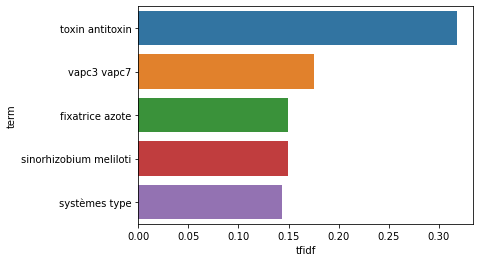

In [16]:
# Construct plot
sns.barplot(x = "tfidf", y = "term", data = test_df)
plt.show()

## TRI-GRAM

In [40]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list, ngram_range=(3,3))





tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})


tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(5)


C:\Users\eyabe\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,document,term,tfidf
1790772,tel-03334270,url https org,0.212089
1224989,tel-03334270,number smoothing steps,0.137197
734179,tel-03334270,estimator algebraic error,0.124131
1357167,tel-03334270,posteriori estimator algebraic,0.120864
1356777,tel-03334270,post smoothing steps,0.111064
2175053,tel-03438101,alcohol clin exp,0.275429
2381152,tel-03438101,clin exp res,0.275429
2175150,tel-03438101,alcohol use disorder,0.126697
3302968,tel-03438101,prise charge addictologique,0.088137
2175099,tel-03438101,alcohol dependent patients,0.082629



# check similarity between documents

In [17]:
#https://studymachinelearning.com/cosine-similarity-text-similarity-metric/



In [19]:
#select 10 docs
docs_names=all_filenames[:10]

#read all 10 docs and append them to a list
data=[]
for doc in docs_names:
    with open(doc, "r",encoding="utf-8") as f:
        #read file as text and store in variable `text`
        text = f.read()
        data.append(text)
        
#get the names of the 10 docs - the IDS
doc_names=[]
for doc in docs_names:
    
    split_string = doc.split(".", 1)
    substring = split_string[0]
    doc_names.append(substring)

doc_names

['tel-03435883',
 'tel-03435884',
 'tel-03435885',
 'tel-03435936',
 'tel-03436011',
 'tel-03436023',
 'tel-03436024',
 'tel-03436025',
 'tel-03436087',
 'tel-03436137']

In [20]:
#from the IDS , we can recover the thesis title from the dataframe by doing a "JOIN"/"MERGE" operation
df_docnames = pd.DataFrame(doc_names)

df_docnames

df_docnames=df_docnames.rename(columns={0:"halId_s"})

df_merged=pd.merge(df_docnames,df,on="halId_s")

doc_names=df_merged["title_s"].tolist()

In [21]:
doc_names

["Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",
 "Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",
 "Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",
 'Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders',
 'Le Conseil économique\\, social et environnemental régional : assemblée du dialogue des intérêts organisés 

## SIMILARITY with COUNT vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words=final_stopwords_list)
vector_matrix = count_vectorizer.fit_transform(data)
vector_matrix

tokens = count_vectorizer.get_feature_names()


vector_matrix.toarray()


def create_dataframe(matrix, tokens):

    #doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

create_dataframe(vector_matrix.toarray(),tokens)


from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)

distance_matrix=create_dataframe(cosine_similarity_matrix,doc_names)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'printr', 'qu', 'quelqu', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [24]:
distance_matrix

,"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume","Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination","Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole","Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders","Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région","Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique","Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC","Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods","La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption","Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations"
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",1.000000,0.251046,0.222532,0.264826,0.113105,0.155256,0.126440,0.182828,0.145476,0.073657
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",0.251046,1.000000,0.227918,0.275752,0.084624,0.128273,0.131361,0.143895,0.162319,0.074265
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0.222532,0.227918,1.000000,0.250513,0.042799,0.240233,0.222247,0.127230,0.112044,0.151241
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",0.264826,0.275752,0.250513,1.000000,0.106430,0.172573,0.179258,0.180509,0.197047,0.100833
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",0.113105,0.084624,0.042799,0.106430,1.000000,0.067130,0.040057,0.099954,0.252367,0.026417
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0.155256,0.128273,0.240233,0.172573,0.067130,1.000000,0.210313,0.157269,0.071876,0.146428
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",0.126440,0.131361,0.2

In [25]:
distance_matrix.to_csv(r'H:\Downloads\Datatsets\Tel\dist_m.csv',index=True)


## Similarity with tf-idf vectorizer instead of count vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer(stop_words=final_stopwords_list)
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,00,000,0000,0000034996,00000407,0000042954,00000457,00000569,00001,00001143,...,𝜎𝑁550,𝜎𝑆𝑁,𝜎𝑇,𝜎𝑇𝑟𝑒𝑓𝑙,𝜎𝑎𝑏𝑠,𝜎𝑒𝑥𝑡,𝜎𝑟𝑒𝑎𝑑,𝜎𝑠𝑐𝑎𝑡,𝜎𝛥𝑇,𝜭abs
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",0.000349,0.002442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",0.010432,0.000869,0.000000,0.000357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0.000000,0.005091,0.000000,0.000000,0.000000,0.000949,0.000000,0.000000,0.001899,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",0.004694,0.028164,0.001204,0.000000,0.001204,0.000000,0.001204,0.001204,0.000000,0.001204,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",0.000214,0.002781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003297,0.008243,0.004946,0.001649,0.01154,0.001649,0.004946,0.004946,0.001649,0.000000
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",0.013870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001186
"Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods",0.028450,0.000662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption",0.011681,0.013260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
"Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,doc_names)

,"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume","Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination","Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole","Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders","Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région","Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique","Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC","Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods","La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption","Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations"
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",1.000000,0.096315,0.109174,0.115588,0.034667,0.062830,0.040490,0.063389,0.053224,0.025030
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",0.096315,1.000000,0.107396,0.107311,0.025434,0.051558,0.039137,0.046040,0.055060,0.023525
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0.109174,0.107396,1.000000,0.124269,0.013666,0.148528,0.106789,0.056616,0.045085,0.074275
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",0.115588,0.107311,0.124269,1.000000,0.040204,0.088630,0.068964,0.068671,0.085992,0.040492
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",0.034667,0.025434,0.013666,0.040204,1.000000,0.023395,0.012296,0.037439,0.140974,0.008700
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0.062830,0.051558,0.148528,0.088630,0.023395,1.000000,0.113551,0.078187,0.031016,0.079431
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",0.040490,0.039137,0.1

In [29]:
distance_matrix2 = create_dataframe(cosine_similarity_matrix,doc_names)

In [37]:
distance_matrix2.to_csv(r'H:\Downloads\Datatsets\Tel\dist_m2.csv',index=True)
